In [1340]:
import pandas as pd
import scipy as sp
path = "./데이터/"

In [1341]:
df = pd.read_excel("./데이터/전체자료_(강우량추가).xlsx")
df.columns

Index(['Unnamed: 0', 'GU_NAME', 'ADM_NM', '동면적(k㎡)', '인구수', '인구밀도(명/km²)',
       '동단위우량', '동단위시우량', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율',
       '제방', '수문', '암거', '구난시설', '노후건물개수', '노후_건물_밀도(동/km²)', '행정동_코드',
       '월평균소득', '면적당_소비액(백만원/km²)', '분기평균총지출', '고령자비율', '장애인비율', '행정동코드', '면적',
       '지하건물', '지하건물_밀도(동/km²)', '빗물펌프장까지의거리', '평균고도', '하천까지의거리', '일일최대강수량',
       '집중호우_발생횟수', '하천면적', '하천면적/면적'],
      dtype='object')

In [1342]:
df["침수여부"] = df["침수횟수"].apply(lambda x: 1 if x > 0 else 0)

In [1343]:
df = df.loc[df['침수횟수'] >0]
df

,Unnamed: 0,GU_NAME,ADM_NM,동면적(k㎡),인구수,인구밀도(명/km²),동단위우량,동단위시우량,침수횟수,경사도,...,지하건물,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부
2,2,종로구,부암동,2.27,9460,4167.400881,16.725406,0.699515,2,0.314583,...,813,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1
3,3,종로구,평창동,8.87,17743,2000.338219,65.354340,2.733348,2,0.229615,...,1797,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1
5,5,종로구,가회동,0.54,4084,7562.962963,3.978731,0.166404,1,0.097500,...,486,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1
6,6,종로구,이화동,0.78,7651,9808.974359,5.747056,0.240362,1,0.078333,...,772,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1
7,7,종로구,혜화동,1.12,19570,17473.214290,8.252183,0.345135,1,0.078333,...,1428,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,강동구,성내2동,0.67,23414,34946.268660,5.893320,0.239663,19,0.055000,...,1326,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1
402,402,강동구,성내3동,0.71,22984,32371.830990,6.245160,0.253972,12,0.072143,...,788,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1
403,403,강동구,길동,1.61,45225,28090.062110,14.161560,0.575907,9,0.176154,...,1319,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1
404,404,강동구,둔촌1동,0.92,74,80.434783,8.092320,0.329090,3,0.151786,...,6,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1


In [1344]:
# df=df.drop(
#     columns=[
#         "Unnamed: 0",
#         "GU_NAME",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "인구밀도(명/km²)",
#         "동단위우량",
#         "동단위시우량",
#         "병원",
#         "경찰",
#         "소방서",
#         "행정동_코드",
#         "월평균소득",
#         "분기평균총지출",
#         "고령자비율",
#         "장애인비율", 
#         "행정동코드",
#         "면적",
#         "침수횟수"
#     ],
#     axis=1,
# )

In [1345]:
df = df.drop(
    columns=[
        "Unnamed: 0",
        "ADM_NM",
        "지하건물",
        "동면적(k㎡)",
        "노후건물개수",
        "인구수",
        "동단위우량",
        "동단위시우량",
        "구난시설",
        "행정동_코드",
        "월평균소득",
        "분기평균총지출",
        "고령자비율",
        "장애인비율",
        "행정동코드",
        "면적",
    ],
    axis=1,
)

In [1346]:
df

,GU_NAME,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,...,면적당_소비액(백만원/km²),지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부
2,종로구,4167.400881,2,0.314583,0.906250,0.147000,0.225413,40,3,40,...,0.000003,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1
3,종로구,2000.338219,2,0.229615,0.974132,0.087765,0.164587,83,20,171,...,0.000004,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1
5,종로구,7562.962963,1,0.097500,0.676056,0.371271,0.128063,5,0,30,...,0.000003,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1
6,종로구,9808.974359,1,0.078333,0.969072,0.393989,0.133864,1,0,74,...,0.000003,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1
7,종로구,17473.214290,1,0.078333,0.942857,0.382785,0.125391,3,0,107,...,0.000003,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,강동구,34946.268660,19,0.055000,0.886957,0.510793,0.005971,0,0,12,...,0.000003,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1
402,강동구,32371.830990,12,0.072143,0.633929,0.438031,0.005765,0,0,17,...,0.000003,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1
403,강동구,28090.062110,9,0.176154,0.608911,0.358275,0.059004,4,0,21,...,0.000003,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1
404,강동구,80.434783,3,0.151786,0.738636,0.229434,0.045133,0,0,9,...,0.000003,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1


In [1347]:
# df = df.drop(
#     columns=[
#         "Unnamed: 0",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "행정동_코드",
#         "행정동코드",
#         "면적",
#         "침수횟수",
#     ],
#     axis=1,
# )

In [1348]:
# df = df.drop(
#     columns=[
#         "Unnamed: 0",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "행정동_코드",
#         "행정동코드",
#         "면적"
#     ],
#     axis=1,
# )

In [1349]:
path3 = path + "서울시_강우량_정보_2022년/"
rain_dict = {}
for i in range(1, 13):
    rain_dict[i] = pd.read_csv(path3 + f"서울시_강우량_정보_2022년{i}월.csv", encoding="euc-kr")
rain_data = pd.concat([rain_dict[i][rain_dict[i]["10분우량"] != 0] for i in range(1, 13)])
rain_agg = rain_data.groupby(["구청명"])["10분우량"].agg(["sum", "count"])
rain_agg.rename(
    columns=dict(zip(["sum", "count"], ["누적강수량", "10분당 측정(횟수)"])), inplace=True
)
rain_agg.index.rename(None, inplace=True)

In [1350]:
rain_agg["추정시우량(연간)"] = rain_agg["누적강수량"] / (rain_agg["10분당 측정(횟수)"] / 6)

In [1351]:
rain_agg.reset_index(inplace=True)

In [1352]:
rain_agg.rename(columns={"index": "GU_NAME", "sum": "강수량"}, inplace=True)
rain_agg.drop(columns=["10분당 측정(횟수)", "추정시우량(연간)"],axis=1, inplace=True)

In [1353]:
df = pd.merge(df,rain_agg, on="GU_NAME")

In [1354]:
df.drop("GU_NAME",axis=1,inplace=True)

In [1355]:
df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후_건물_밀도(동/km²),...,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부,누적강수량
0,4167.400881,2,0.314583,0.906250,0.147000,0.225413,40,3,40,428.193833,...,358.149780,5699.673727,147.729398,0.579168,225.5,11,16178.933,7127.283260,1,2953.5
1,2000.338219,2,0.229615,0.974132,0.087765,0.164587,83,20,171,150.056370,...,202.593010,5465.810242,273.213812,0.104944,225.5,11,32977.944,3717.919278,1,2953.5
2,7562.962963,1,0.097500,0.676056,0.371271,0.128063,5,0,30,442.592593,...,900.000000,3972.557785,60.501888,0.245802,225.5,11,3088.778,5719.959259,1,2953.5
3,9808.974359,1,0.078333,0.969072,0.393989,0.133864,1,0,74,738.461538,...,989.743590,2490.998419,45.701522,0.612614,225.5,11,0.000,0.000000,1,2953.5
4,17473.214290,1,0.078333,0.942857,0.382785,0.125391,3,0,107,991.964286,...,1275.000000,3300.974941,58.444812,0.916657,225.5,11,0.000,0.000000,1,2953.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,34946.268660,19,0.055000,0.886957,0.510793,0.005971,0,0,12,1737.313433,...,1979.104478,909.339214,18.574853,1.992085,398.5,13,0.000,0.000000,1,3426.5
262,32371.830990,12,0.072143,0.633929,0.438031,0.005765,0,0,17,598.591549,...,1109.859155,1179.328824,17.434927,1.346759,398.5,13,0.000,0.000000,1,3426.5
263,28090.062110,9,0.176154,0.608911,0.358275,0.059004,4,0,21,554.037267,...,819.254658,1960.757507,28.949684,1.073927,398.5,13,1569.521,974.857764,1,3426.5
264,80.434783,3,0.151786,0.738636,0.229434,0.045133,0,0,9,11.956522,...,6.521739,1646.603436,30.338302,1.163773,398.5,13,508.659,552.890217,1,3426.5


In [1356]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


MinMaxScaler = MinMaxScaler()
scale_df = MinMaxScaler.fit_transform(df)

In [1357]:
sca_df = pd.DataFrame(data=scale_df, columns=df.columns)
sca_df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후_건물_밀도(동/km²),...,지하건물_밀도(동/km²),빗물펌프장까지의거리,평균고도,하천까지의거리,일일최대강수량,집중호우_발생횟수,하천면적,하천면적/면적,침수여부,누적강수량
0,0.082150,0.001138,0.770108,0.905668,0.167866,0.281813,0.087912,0.025424,0.062003,0.145247,...,0.127860,0.734566,0.528602,0.144409,0.077736,0.041237,0.004555,0.010605,0.0,0.378893
1,0.038591,0.001138,0.558745,0.973971,0.068699,0.205517,0.182418,0.169492,0.270270,0.050641,...,0.071504,0.703668,1.000000,0.008122,0.077736,0.041237,0.009285,0.005532,0.0,0.378893
2,0.150403,0.000000,0.230100,0.674044,0.543326,0.159705,0.010989,0.000000,0.046105,0.150145,...,0.324165,0.506384,0.200920,0.048603,0.077736,0.041237,0.000870,0.008511,0.0,0.378893
3,0.195549,0.000000,0.182421,0.968880,0.581359,0.166981,0.002198,0.000000,0.116057,0.250783,...,0.356677,0.310644,0.145321,0.154021,0.077736,0.041237,0.000000,0.000000,0.0,0.378893
4,0.349604,0.000000,0.182421,0.942502,0.562603,0.156353,0.006593,0.000000,0.168521,0.337010,...,0.460022,0.417656,0.193192,0.241399,0.077736,0.041237,0.000000,0.000000,0.0,0.378893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.700821,0.020478,0.124378,0.886254,0.776905,0.006560,0.000000,0.000000,0.017488,0.590536,...,0.715109,0.101679,0.043416,0.550464,0.292910,0.061856,0.000000,0.000000,0.0,0.510428
262,0.649073,0.012514,0.167022,0.631655,0.655091,0.006302,0.000000,0.000000,0.025437,0.203207,...,0.400194,0.137349,0.039133,0.365005,0.292910,0.061856,0.000000,0.000000,0.0,0.510428
263,0.563008,0.009101,0.425756,0.606482,0.521569,0.073081,0.008791,0.000000,0.031797,0.188052,...,0.294912,0.240590,0.082390,0.286596,0.292910,0.061856,0.000442,0.001451,0.0,0.510428
264,0.000000,0.002275,0.365139,0.737013,0.305872,0.055683,0.000000,0.000000,0.012719,0.003667,...,0.000470,0.199084,0.087607,0.312417,0.292910,0.061856,0.000143,0.000823,0.0,0.510428


In [1358]:
# from scipy.stats import ttest_ind

# # Assuming you have a DataFrame with a '침수여부' column and other numeric columns for the variables you want to compare
# # Replace '침수여부' with the actual column name in your DataFrame

# categorical_column = "침수여부"

# # Iterate through numeric columns
# for numeric_column in df.select_dtypes(include="number").columns:
#     if numeric_column != categorical_column:
#         group1 = sca_df[sca_df[categorical_column] == 1][numeric_column]
#         group2 = sca_df[sca_df[categorical_column] == 0][numeric_column]

#         # Perform t-test
#         t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

#         # Print the results for each column
#         print(f"T-test for {numeric_column}:")
#         print("  T-statistic:", t_statistic)
#         print("  P-value:", p_value)

#         # Check for statistical significance
#         alpha = 0.1
#         if p_value < alpha:
#             print(
#                 "  Reject the null hypothesis. There is a significant difference between groups."
#             )
#         else:
#             print(
#                 "  Fail to reject the null hypothesis. There is no significant difference between groups."
#             )

#         print("\n")

In [1359]:
sca_df.columns

Index(['인구밀도(명/km²)', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율', '제방',
       '수문', '암거', '노후_건물_밀도(동/km²)', '면적당_소비액(백만원/km²)', '지하건물_밀도(동/km²)',
       '빗물펌프장까지의거리', '평균고도', '하천까지의거리', '일일최대강수량', '집중호우_발생횟수', '하천면적',
       '하천면적/면적', '침수여부', '누적강수량'],
      dtype='object')

In [1360]:
sca_df = sca_df[
    [
        "양호비율",
        "침수횟수",
        "도로_건물_면적_비율",
        "녹지_면적_비율",
        "노후_건물_밀도(동/km²)",
        "면적당_소비액(백만원/km²)",
        "지하건물_밀도(동/km²)",
        "하천면적/면적",
        "하천까지의거리",
        "일일최대강수량",
        "평균고도",
        "집중호우_발생횟수",
        "빗물펌프장까지의거리"
    ]
]

In [1361]:
sca_df

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.905668,0.001138,0.167866,0.281813,0.145247,0.299934,0.127860,0.010605,0.144409,0.077736,0.528602,0.041237,0.734566
1,0.973971,0.001138,0.068699,0.205517,0.050641,0.469068,0.071504,0.005532,0.008122,0.077736,1.000000,0.041237,0.703668
2,0.674044,0.000000,0.543326,0.159705,0.150145,0.268971,0.324165,0.008511,0.048603,0.077736,0.200920,0.041237,0.506384
3,0.968880,0.000000,0.581359,0.166981,0.250783,0.183405,0.356677,0.000000,0.154021,0.077736,0.145321,0.041237,0.310644
4,0.942502,0.000000,0.562603,0.156353,0.337010,0.241311,0.460022,0.000000,0.241399,0.077736,0.193192,0.041237,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.886254,0.020478,0.776905,0.006560,0.590536,0.130121,0.715109,0.000000,0.550464,0.292910,0.043416,0.061856,0.101679
262,0.631655,0.012514,0.655091,0.006302,0.203207,0.146459,0.400194,0.000000,0.365005,0.292910,0.039133,0.061856,0.137349
263,0.606482,0.009101,0.521569,0.073081,0.188052,0.136691,0.294912,0.001451,0.286596,0.292910,0.082390,0.061856,0.240590
264,0.737013,0.002275,0.305872,0.055683,0.003667,0.272555,0.000470,0.000823,0.312417,0.292910,0.087607,0.061856,0.199084


In [1362]:
# correlation_matrix = df.corr()
# correlation_with_flooding = correlation_matrix["침수횟수"]

In [1363]:
df = df.drop("침수여부",axis=1)

In [1364]:
sca_df

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.905668,0.001138,0.167866,0.281813,0.145247,0.299934,0.127860,0.010605,0.144409,0.077736,0.528602,0.041237,0.734566
1,0.973971,0.001138,0.068699,0.205517,0.050641,0.469068,0.071504,0.005532,0.008122,0.077736,1.000000,0.041237,0.703668
2,0.674044,0.000000,0.543326,0.159705,0.150145,0.268971,0.324165,0.008511,0.048603,0.077736,0.200920,0.041237,0.506384
3,0.968880,0.000000,0.581359,0.166981,0.250783,0.183405,0.356677,0.000000,0.154021,0.077736,0.145321,0.041237,0.310644
4,0.942502,0.000000,0.562603,0.156353,0.337010,0.241311,0.460022,0.000000,0.241399,0.077736,0.193192,0.041237,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.886254,0.020478,0.776905,0.006560,0.590536,0.130121,0.715109,0.000000,0.550464,0.292910,0.043416,0.061856,0.101679
262,0.631655,0.012514,0.655091,0.006302,0.203207,0.146459,0.400194,0.000000,0.365005,0.292910,0.039133,0.061856,0.137349
263,0.606482,0.009101,0.521569,0.073081,0.188052,0.136691,0.294912,0.001451,0.286596,0.292910,0.082390,0.061856,0.240590
264,0.737013,0.002275,0.305872,0.055683,0.003667,0.272555,0.000470,0.000823,0.312417,0.292910,0.087607,0.061856,0.199084


In [1365]:
# plt.rc("font", family="Malgun Gothic")
# plt.rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.xticks(rotation=45)  # Corrected the typo here
# sns.boxplot(data=sca_df)  # Corrected the library name here

# plt.show()

In [1366]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Assuming '침수여부' is the target variable, and other columns are features
# features = sca_df.drop(["침수여부"], axis=1)
# target = sca_df["침수여부"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     features, target, test_size=0.2, random_state=42
# )

# # Create a Logistic Regression model
# model = LogisticRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Create a heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     conf_matrix,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     cbar=False,
#     xticklabels=["Not Flooded", "Flooded"],
#     yticklabels=["Not Flooded", "Flooded"],
# )
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Classification Report:\n{classification_rep}")

In [1367]:
sca_df

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.905668,0.001138,0.167866,0.281813,0.145247,0.299934,0.127860,0.010605,0.144409,0.077736,0.528602,0.041237,0.734566
1,0.973971,0.001138,0.068699,0.205517,0.050641,0.469068,0.071504,0.005532,0.008122,0.077736,1.000000,0.041237,0.703668
2,0.674044,0.000000,0.543326,0.159705,0.150145,0.268971,0.324165,0.008511,0.048603,0.077736,0.200920,0.041237,0.506384
3,0.968880,0.000000,0.581359,0.166981,0.250783,0.183405,0.356677,0.000000,0.154021,0.077736,0.145321,0.041237,0.310644
4,0.942502,0.000000,0.562603,0.156353,0.337010,0.241311,0.460022,0.000000,0.241399,0.077736,0.193192,0.041237,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.886254,0.020478,0.776905,0.006560,0.590536,0.130121,0.715109,0.000000,0.550464,0.292910,0.043416,0.061856,0.101679
262,0.631655,0.012514,0.655091,0.006302,0.203207,0.146459,0.400194,0.000000,0.365005,0.292910,0.039133,0.061856,0.137349
263,0.606482,0.009101,0.521569,0.073081,0.188052,0.136691,0.294912,0.001451,0.286596,0.292910,0.082390,0.061856,0.240590
264,0.737013,0.002275,0.305872,0.055683,0.003667,0.272555,0.000470,0.000823,0.312417,0.292910,0.087607,0.061856,0.199084


In [1368]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Create a linear regression model
# model = LinearRegression()

# # Use RFE for feature selection
# rfe = RFE(model, n_features_to_select=8)
# X_train_selected = rfe.fit_transform(X_train, y_train)
# X_test_selected = rfe.transform(X_test)

# # Train the model with the selected features
# model.fit(X_train_selected, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_selected)

# # Evaluate the model using regression metrics
# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r_squared:.2f}")


In [1369]:
# drop_feature = ["GU_NAME", "ADM_NM", "동면적(k㎡)", "인구수", "동단위우량", "도로_건물_면적", "침수횟수"]
# feature = data.columns.difference(drop_feature)

# pre_data = data.copy()  # 임시저장
# pre_data[feature] = minmax.transform(X=data[feature])

In [1370]:
# # k값
# import numpy as np

# k = 1 / np.log(len(pre_data))
# print(k)

In [1371]:
# def p(x):
#     if x == 1 or x == 0:
#         return 0
#     else:
#         return x * np.log(x)

In [1372]:

# sca_df =sca_df.drop("침수여부", axis=1)

In [1373]:
pca = PCA()
pca.fit_transform(sca_df)

array([[-0.59248077, -0.5803354 ,  0.14700742, ...,  0.06380026,
        -0.01675538,  0.01302594],
       [-0.82284362, -0.64581743,  0.24903193, ...,  0.26764082,
        -0.24023022, -0.05739312],
       [-0.14568253, -0.33163366, -0.09728972, ...,  0.04472422,
         0.0087634 , -0.09256761],
       ...,
       [-0.02979492, -0.02012246, -0.07263434, ..., -0.00332364,
        -0.00179225, -0.036549  ],
       [-0.43697937,  0.05394958, -0.06127405, ..., -0.00495729,
         0.04199854,  0.0157586 ],
       [-0.34819093, -0.12859962,  0.00176937, ..., -0.04301297,
         0.07015031, -0.02845737]])

In [1374]:
pca.explained_variance_ratio_

array([0.32186518, 0.17064435, 0.14440677, 0.09422759, 0.06110254,
       0.04712632, 0.03876511, 0.03368005, 0.03107684, 0.02351942,
       0.01416213, 0.01197144, 0.00745225])

In [1375]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.32186518, 0.49250953, 0.6369163 , 0.73114389, 0.79224643,
       0.83937276, 0.87813787, 0.91181792, 0.94289475, 0.96641418,
       0.98057631, 0.99254775, 1.        ])

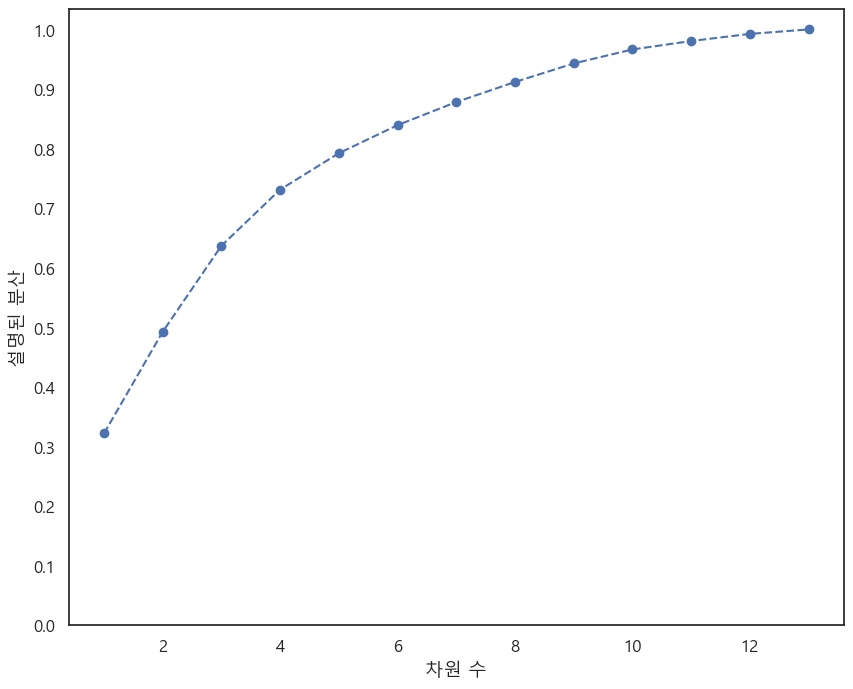

In [1376]:
import platform

plt.figure(figsize=(10, 8))

plt.plot(
    range(1, 14), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.yticks([i / 10 for i in range(11)])
plt.ylabel("설명된 분산")


plt.xlabel("차원 수")
plt.yticks

plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [1377]:
pca_2 = PCA(n_components=3)
pca_2.fit(sca_df)

PCA(n_components=3)

In [1378]:
pca_2_result = pca_2.fit_transform(sca_df)

In [1379]:
results = pd.DataFrame(
    data=pca_2.fit_transform(sca_df),
    columns=["PC-1", "PC-2","PC-3"],
)

In [1380]:
# 결과 출력
components_df = pd.DataFrame(
    pca_2.components_, columns=sca_df.columns, index=results.columns
)
components_df

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
PC-1,-0.131065,0.066205,0.537535,-0.162218,0.489726,-0.209250,0.562955,-0.064173,0.067803,-0.019401,-0.134172,0.089299,-0.166061
PC-2,-0.382245,0.065267,0.060527,-0.139431,-0.183764,0.298032,-0.134203,0.069969,0.174470,0.600612,-0.230275,0.225814,-0.431083
PC-3,0.491079,0.010228,-0.019185,0.101742,-0.026481,-0.136968,0.129930,-0.204054,0.124722,0.418645,0.263212,0.612227,0.187389


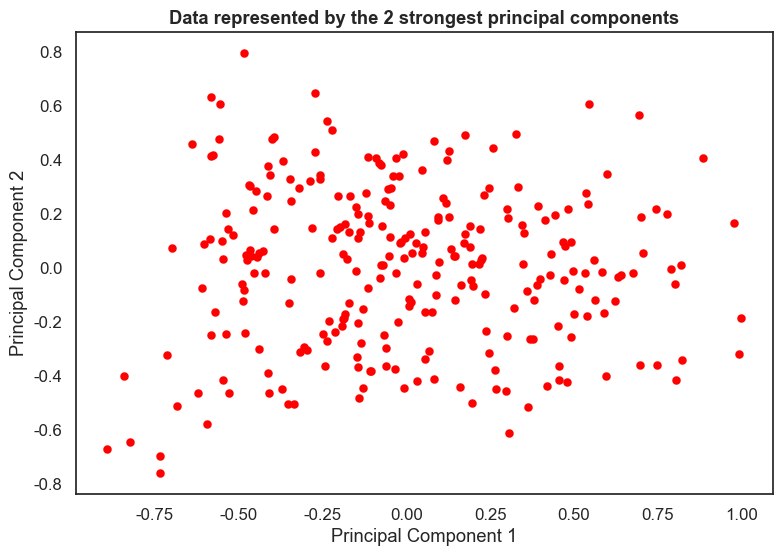

In [1381]:
sb.set(style="white", rc={"figure.figsize": (9, 6)}, font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color="red", lw=0.1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data represented by the 2 strongest principal components", fontweight="bold")
plt.show()

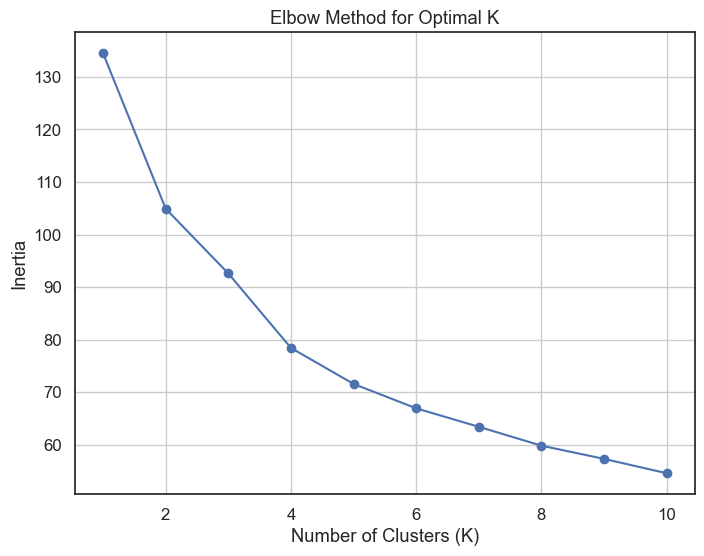

In [1382]:
inertia = []

# Define the range of K values to test
k_range = range(1, 11)  # You can adjust this range based on your problem

# Calculate the inertia for different K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()
plt.close()

In [1383]:
inertia = []
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=15, max_iter=500, random_state=17
    )
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

In [1384]:
from sklearn.metrics import silhouette_score, silhouette_samples
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


silhouette = {}
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=100, max_iter=500, random_state=17
    )
    kmeans.fit(sca_df)
    silhouette[i] = silhouette_score(sca_df, kmeans.labels_, metric="euclidean")

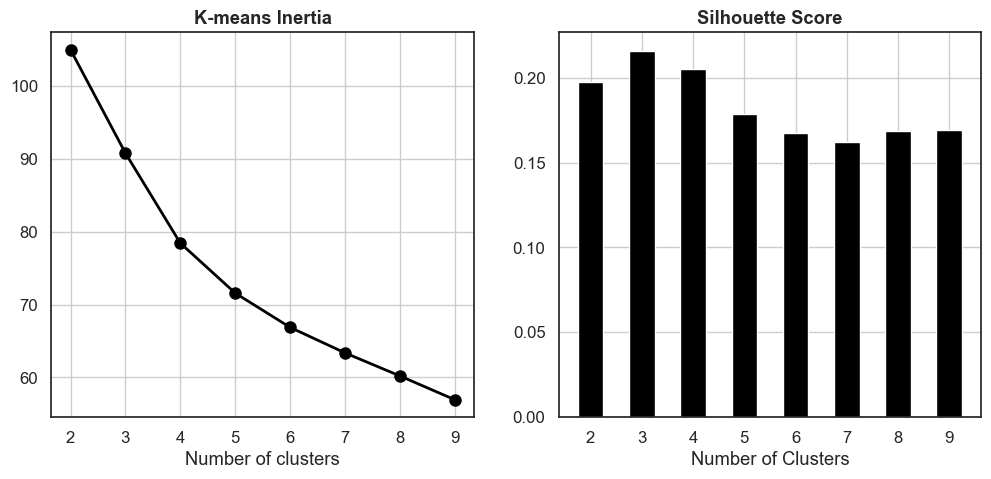

In [1385]:
sb.set(style="white", font_scale=1.1, rc={"figure.figsize": (12, 5)})

plt.subplot(1, 2, 1)

plt.plot(range(2, len(inertia) + 2), inertia, marker="o", lw=2, ms=8, color="black")
plt.xlabel("Number of clusters")
plt.title("K-means Inertia", fontweight="bold")
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(
    range(len(silhouette)),
    list(silhouette.values()),
    align="center",
    color="black",
    width=0.5,
)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title("Silhouette Score", fontweight="bold")
plt.xlabel("Number of Clusters")


plt.show()

In [1386]:
sca_df.columns

Index(['양호비율', '침수횟수', '도로_건물_면적_비율', '녹지_면적_비율', '노후_건물_밀도(동/km²)',
       '면적당_소비액(백만원/km²)', '지하건물_밀도(동/km²)', '하천면적/면적', '하천까지의거리', '일일최대강수량',
       '평균고도', '집중호우_발생횟수', '빗물펌프장까지의거리'],
      dtype='object')

In [1387]:
kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(
    sca_df[sca_df.columns]
)
y

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1])

In [1388]:
pca_score = pca.transform(sca_df)

In [1389]:
kmeans = KMeans(n_clusters=3, random_state=17, init="k-means++")
kmeans_labels = kmeans.fit_predict(pca_score)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


1    150
0    100
2     16
Name: count, dtype: int64

In [1390]:
sca_df

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.905668,0.001138,0.167866,0.281813,0.145247,0.299934,0.127860,0.010605,0.144409,0.077736,0.528602,0.041237,0.734566
1,0.973971,0.001138,0.068699,0.205517,0.050641,0.469068,0.071504,0.005532,0.008122,0.077736,1.000000,0.041237,0.703668
2,0.674044,0.000000,0.543326,0.159705,0.150145,0.268971,0.324165,0.008511,0.048603,0.077736,0.200920,0.041237,0.506384
3,0.968880,0.000000,0.581359,0.166981,0.250783,0.183405,0.356677,0.000000,0.154021,0.077736,0.145321,0.041237,0.310644
4,0.942502,0.000000,0.562603,0.156353,0.337010,0.241311,0.460022,0.000000,0.241399,0.077736,0.193192,0.041237,0.417656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.886254,0.020478,0.776905,0.006560,0.590536,0.130121,0.715109,0.000000,0.550464,0.292910,0.043416,0.061856,0.101679
262,0.631655,0.012514,0.655091,0.006302,0.203207,0.146459,0.400194,0.000000,0.365005,0.292910,0.039133,0.061856,0.137349
263,0.606482,0.009101,0.521569,0.073081,0.188052,0.136691,0.294912,0.001451,0.286596,0.292910,0.082390,0.061856,0.240590
264,0.737013,0.002275,0.305872,0.055683,0.003667,0.272555,0.000470,0.000823,0.312417,0.292910,0.087607,0.061856,0.199084


In [1391]:
df_pca_kmeans = pd.concat(
    [sca_df, pd.DataFrame({"Segment K-means PCA": kmeans_labels})], axis=1
)
df_pca_kmeans.drop(["침수횟수"], axis=1)
df_pca_kmeans["침수횟수"] = df["침수횟수"]

In [1392]:
df["Segment K-means PCA"] = df_pca_kmeans["Segment K-means PCA"]

In [1393]:
df_pca_kmeans.groupby("Segment K-means PCA")["침수횟수"].median()

Segment K-means PCA
0     9.5
1     4.0
2    44.0
Name: 침수횟수, dtype: float64

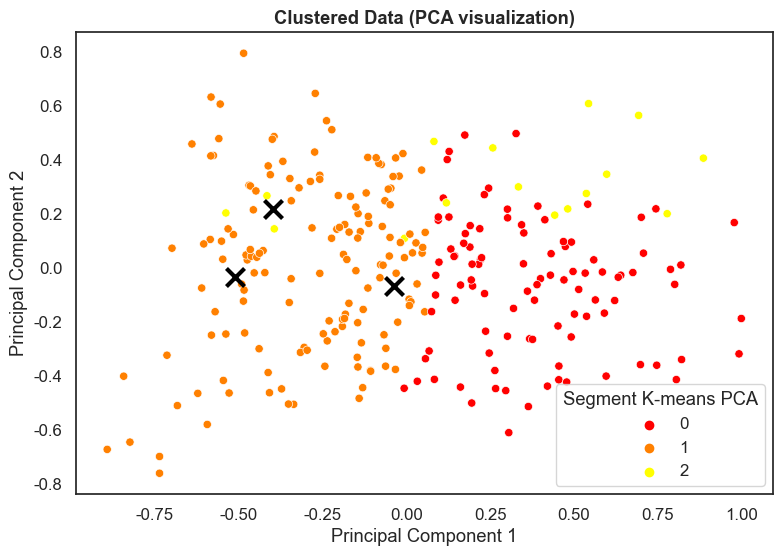

In [1394]:
sb.set(style="white", rc={"figure.figsize": (9, 6)}, font_scale=1.1)
x_axis = pca_2_result[:, 0]
y_axis = pca_2_result[:, 1]
sb.scatterplot(
    x=x_axis, y=y_axis, hue=df_pca_kmeans["Segment K-means PCA"], palette="autumn"
)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="black",
    zorder=10,
    lw=3,
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustered Data (PCA visualization)", fontweight="bold")
plt.show()

In [1395]:
def backward_elimination(X, y):
    included = list(X.columns)

    while True:
        model = sm.OLS(endog=y, exog=X[included]).fit()
        rsquard_adj = model.rsquared_adj
        worst_feature = None
        changed = False

        for feature in included:
            droped_feature = [x for x in included if x != feature]
            droped_model = sm.OLS(endog=y, exog=X[droped_feature]).fit()
            if droped_model.rsquared_adj > rsquard_adj:
                # print(droped_model.rsquared_adj,rsquard_adj)
                worst_feature = feature
                break
        # print(included)
        if worst_feature:
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    model = sm.OLS(y, X[included]).fit()
    return model  # , included, rsquard_adj

In [1396]:
df_pca_kmeans

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리,Segment K-means PCA
0,0.905668,2,0.167866,0.281813,0.145247,0.299934,0.127860,0.010605,0.144409,0.077736,0.528602,0.041237,0.734566,1
1,0.973971,2,0.068699,0.205517,0.050641,0.469068,0.071504,0.005532,0.008122,0.077736,1.000000,0.041237,0.703668,1
2,0.674044,1,0.543326,0.159705,0.150145,0.268971,0.324165,0.008511,0.048603,0.077736,0.200920,0.041237,0.506384,1
3,0.968880,1,0.581359,0.166981,0.250783,0.183405,0.356677,0.000000,0.154021,0.077736,0.145321,0.041237,0.310644,1
4,0.942502,1,0.562603,0.156353,0.337010,0.241311,0.460022,0.000000,0.241399,0.077736,0.193192,0.041237,0.417656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.886254,19,0.776905,0.006560,0.590536,0.130121,0.715109,0.000000,0.550464,0.292910,0.043416,0.061856,0.101679,0
262,0.631655,12,0.655091,0.006302,0.203207,0.146459,0.400194,0.000000,0.365005,0.292910,0.039133,0.061856,0.137349,0
263,0.606482,9,0.521569,0.073081,0.188052,0.136691,0.294912,0.001451,0.286596,0.292910,0.082390,0.061856,0.240590,1
264,0.737013,3,0.305872,0.055683,0.003667,0.272555,0.000470,0.000823,0.312417,0.292910,0.087607,0.061856,0.199084,1


In [1397]:
import pandas as pd


def process_cluster_label(data, cluster_label):
    # Filter data for the specified cluster label
    cluster_data = data[data["Segment K-means PCA"] == cluster_label]

    # Drop unnecessary columns
    cluster_data = cluster_data.drop(
        ["침수횟수",  "Segment K-means PCA"], axis=1
    )

    # Add the '침수횟수' column from the original data
    cluster_data = cluster_data.merge(
        data[["침수횟수"]], left_index=True, right_index=True
    )

    return cluster_data


r_group = {}
for i in range(0, 3):
    r_group[i] = process_cluster_label(df_pca_kmeans, i)

In [1398]:
r_group[0]

,양호비율,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리,침수횟수
4,0.942502,0.562603,0.156353,0.337010,0.241311,0.460022,0.000000,0.241399,0.077736,0.193192,0.041237,0.417656,1
5,0.815764,0.762044,0.046517,0.736943,0.058933,0.463236,0.042161,0.042996,0.077736,0.052133,0.041237,0.167381,2
7,1.000000,0.681305,0.240123,0.832212,0.153113,0.522634,0.065701,0.223922,0.077736,0.126998,0.041237,0.146277,5
8,0.500677,0.847821,0.074715,0.595337,0.100355,0.513588,0.066809,0.072904,0.077736,0.047312,0.041237,0.094846,1
14,0.201420,1.000000,0.004646,0.945818,0.222438,0.573373,0.000000,0.149271,0.209577,0.061272,0.051546,0.100427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.639486,0.503723,0.081515,0.346460,0.116004,0.368700,0.243981,0.177454,0.292910,0.029018,0.061856,0.030590,14
259,0.894083,0.501796,0.004861,0.428870,0.193694,0.480085,0.000000,0.643998,0.292910,0.064129,0.061856,0.095776,8
260,0.626836,0.866288,0.029217,0.198994,0.248229,0.309173,0.048812,0.130327,0.292910,0.029170,0.061856,0.067385,1
261,0.886254,0.776905,0.006560,0.590536,0.130121,0.715109,0.000000,0.550464,0.292910,0.043416,0.061856,0.101679,19


In [1399]:
model_0 = backward_elimination(
    r_group[0].drop(["침수횟수"], axis=1), r_group[0]["침수횟수"]
)
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.386
Method:                 Least Squares   F-statistic:                              9.967
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    3.12e-09
Time:                        02:32:12   Log-Likelihood:                         -599.97
No. Observations:                 100   AIC:                                      1214.
Df Residuals:                      93   BIC:                                      1232.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
면적당_소비액(백만원/km²)   119.3810    104.713      1.140      0.257     -88.559     327.320
지하건물_밀도(동/km²)     155.9607     38.192      4.084      0.000      80.119     231.803
하천면적/면적           -137.9717    124.411     -1.109      0.270    -385.028     109.085
하천까지의거리           -120.4171     57.026     -2.112      0.037    -233.660      -7.174
일일최대강수량            238.4721     56.016      4.257      0.000     127.235     349.709
평균고도              -379.2199    161.488     -2.348      0.021    -699.903     -58.537
집중호우_발생횟수        -1713.7291    442.431     -3.873      0.000   -2592.309    -835.150
==============================================================================
Omnibus:                      108.884   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1730.993
Skew:                           3.579   Prob(JB):                         0.00
Kurtosis:                      22.084   Cond. No.                         32.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1400]:
model_1 = backward_elimination(
    r_group[1].drop(["침수횟수"], axis=1), r_group[1]["침수횟수"]
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.416
Model:                            OLS   Adj. R-squared (uncentered):              0.392
Method:                 Least Squares   F-statistic:                              17.13
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    6.98e-15
Time:                        02:32:12   Log-Likelihood:                         -726.60
No. Observations:                 150   AIC:                                      1465.
Df Residuals:                     144   BIC:                                      1483.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
양호비율          -22.0392     11.702     -1.883      0.062     -45.169       1.090
도로_건물_면적_비율    46.0814     14.744      3.126      0.002      16.940      75.223
녹지_면적_비율       14.8597     13.332      1.115      0.267     -11.493      41.212
일일최대강수량        72.5597     12.524      5.794      0.000      47.806      97.314
평균고도           40.3311     19.226      2.098      0.038       2.329      78.333
집중호우_발생횟수    -511.5468    130.386     -3.923      0.000    -769.264    -253.830
==============================================================================
Omnibus:                      119.697   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1036.248
Skew:                           2.948   Prob(JB):                    9.59e-226
Kurtosis:                      14.447   Cond. No.                         46.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1401]:
model_2 = backward_elimination(
    r_group[2].drop(["침수횟수"], axis=1), r_group[2]["침수횟수"]
)
model_2.summary()

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              8.493
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                     0.00186
Time:                        02:32:12   Log-Likelihood:                         -76.558
No. Observations:                  16   AIC:                                      165.1
Df Residuals:                      10   BIC:                                      169.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
양호비율               -75.5126     52.262     -1.445      0.179    -191.960      40.934
노후_건물_밀도(동/km²)    620.1230    200.076      3.099      0.011     174.325    1065.921
면적당_소비액(백만원/km²)   802.4898    220.323      3.642      0.005     311.579    1293.401
지하건물_밀도(동/km²)    -340.2480    132.783     -2.562      0.028    -636.107     -44.389
하천면적/면적           1818.9027    816.306      2.228      0.050       0.060    3637.745
빗물펌프장까지의거리        -165.3601    130.309     -1.269      0.233    -455.707     124.987
==============================================================================
Omnibus:                        1.987   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.454
Skew:                          -0.558   Prob(JB):                        0.483
Kurtosis:                       2.033   Cond. No.                         88.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1402]:
group_0 = df_pca_kmeans[df_pca_kmeans["Segment K-means PCA"] == 0]
group_1 = df_pca_kmeans[df_pca_kmeans["Segment K-means PCA"] == 1]
group_2 = df_pca_kmeans[df_pca_kmeans["Segment K-means PCA"] == 2]

In [1403]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_0.drop(["침수횟수"], axis=1), group_0["침수횟수"])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_0.drop(["침수횟수"], axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(
    feature_importance_mapping.items(), key=lambda x: x[1], reverse=True
)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 일일최대강수량, Importance: 0.1679233177405105
Feature: 녹지_면적_비율, Importance: 0.14588912772401308
Feature: 면적당_소비액(백만원/km²), Importance: 0.11740735394006022
Feature: 지하건물_밀도(동/km²), Importance: 0.10925389986954757
Feature: 빗물펌프장까지의거리, Importance: 0.10800837064872523
Feature: 평균고도, Importance: 0.07481829841812741
Feature: 하천까지의거리, Importance: 0.07174611847926239
Feature: 하천면적/면적, Importance: 0.057865671564336175
Feature: 노후_건물_밀도(동/km²), Importance: 0.04987886561208494
Feature: 집중호우_발생횟수, Importance: 0.04275331338178709
Feature: 양호비율, Importance: 0.04020455816094976
Feature: 도로_건물_면적_비율, Importance: 0.014251104460595694
Feature: Segment K-means PCA, Importance: 0.0


In [1404]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_1.drop(["침수횟수"], axis=1), group_1["침수횟수"])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_1.drop(["침수횟수"], axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(
    feature_importance_mapping.items(), key=lambda x: x[1], reverse=True
)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 평균고도, Importance: 0.1374958222018846
Feature: 노후_건물_밀도(동/km²), Importance: 0.11249380087408253
Feature: 양호비율, Importance: 0.10110541250506042
Feature: 면적당_소비액(백만원/km²), Importance: 0.09846165187178654
Feature: 녹지_면적_비율, Importance: 0.09485151650644606
Feature: 일일최대강수량, Importance: 0.0863611154104113
Feature: 도로_건물_면적_비율, Importance: 0.08505896490051415
Feature: 하천까지의거리, Importance: 0.0844476581712497
Feature: 하천면적/면적, Importance: 0.0750684663536776
Feature: 집중호우_발생횟수, Importance: 0.04680862955510843
Feature: 지하건물_밀도(동/km²), Importance: 0.04104488039347192
Feature: 빗물펌프장까지의거리, Importance: 0.03680208125630659
Feature: Segment K-means PCA, Importance: 0.0


In [1405]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(group_2.drop(["침수횟수"], axis=1), group_2["침수횟수"])

# Extract feature importance scores
feature_importance = clf.feature_importances_

# Map feature importance scores to feature names (if available)
feature_names = group_2.drop(["침수횟수"], axis=1).columns
feature_importance_mapping = dict(zip(feature_names, feature_importance))

# Sort and print feature importance
sorted_feature_importance = sorted(
    feature_importance_mapping.items(), key=lambda x: x[1], reverse=True
)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 도로_건물_면적_비율, Importance: 0.40336134453781514
Feature: 녹지_면적_비율, Importance: 0.15966386554621848
Feature: 하천까지의거리, Importance: 0.14565826330532214
Feature: 지하건물_밀도(동/km²), Importance: 0.13445378151260504
Feature: 면적당_소비액(백만원/km²), Importance: 0.0896358543417367
Feature: 평균고도, Importance: 0.06722689075630252
Feature: 양호비율, Importance: 0.0
Feature: 노후_건물_밀도(동/km²), Importance: 0.0
Feature: 하천면적/면적, Importance: 0.0
Feature: 일일최대강수량, Importance: 0.0
Feature: 집중호우_발생횟수, Importance: 0.0
Feature: 빗물펌프장까지의거리, Importance: 0.0
Feature: Segment K-means PCA, Importance: 0.0


In [1406]:
import sklearn.tree as sktree
import sklearn.metrics as skmet

해석을 위해서 원본의 값을 이용하는게 더 편하다

In [1407]:
selected_columns = [
    "양호비율",
    "침수횟수",
    "도로_건물_면적_비율",
    "녹지_면적_비율",
    "노후_건물_밀도(동/km²)",
    "면적당_소비액(백만원/km²)",
    "지하건물_밀도(동/km²)",
    "하천면적/면적",
    "하천까지의거리",
    "일일최대강수량",
    "평균고도",
    "집중호우_발생횟수",
    "빗물펌프장까지의거리",
]

df = df[selected_columns]

In [1408]:
target_col = "침수횟수"
feature_col = df.columns.difference(["Segment K-means PCA", target_col])

In [1409]:
feature_col

Index(['노후_건물_밀도(동/km²)', '녹지_면적_비율', '도로_건물_면적_비율', '면적당_소비액(백만원/km²)',
       '빗물펌프장까지의거리', '양호비율', '일일최대강수량', '지하건물_밀도(동/km²)', '집중호우_발생횟수', '평균고도',
       '하천까지의거리', '하천면적/면적'],
      dtype='object')

In [1410]:
tree_regression = sktree.DecisionTreeRegressor(criterion="squared_error")
tree_regression.fit(X=df[feature_col], y=df[target_col])
print("전체데이터 사용시 depth : ", tree_regression.get_depth())
print("전체데이터 사용시 최종 leaf 개수", tree_regression.get_n_leaves())

전체데이터 사용시 depth :  18
전체데이터 사용시 최종 leaf 개수 204


In [1411]:
df

,양호비율,침수횟수,도로_건물_면적_비율,녹지_면적_비율,노후_건물_밀도(동/km²),면적당_소비액(백만원/km²),지하건물_밀도(동/km²),하천면적/면적,하천까지의거리,일일최대강수량,평균고도,집중호우_발생횟수,빗물펌프장까지의거리
0,0.906250,2,0.147000,0.225413,428.193833,0.000003,358.149780,7127.283260,0.579168,225.5,147.729398,11,5699.673727
1,0.974132,2,0.087765,0.164587,150.056370,0.000004,202.593010,3717.919278,0.104944,225.5,273.213812,11,5465.810242
2,0.676056,1,0.371271,0.128063,442.592593,0.000003,900.000000,5719.959259,0.245802,225.5,60.501888,11,3972.557785
3,0.969072,1,0.393989,0.133864,738.461538,0.000003,989.743590,0.000000,0.612614,225.5,45.701522,11,2490.998419
4,0.942857,1,0.382785,0.125391,991.964286,0.000003,1275.000000,0.000000,0.916657,225.5,58.444812,11,3300.974941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.886957,19,0.510793,0.005971,1737.313433,0.000003,1979.104478,0.000000,1.992085,398.5,18.574853,13,909.339214
262,0.633929,12,0.438031,0.005765,598.591549,0.000003,1109.859155,0.000000,1.346759,398.5,17.434927,13,1179.328824
263,0.608911,9,0.358275,0.059004,554.037267,0.000003,819.254658,974.857764,1.073927,398.5,28.949684,13,1960.757507
264,0.738636,3,0.229434,0.045133,11.956522,0.000003,6.521739,552.890217,1.163773,398.5,30.338302,13,1646.603436


In [1412]:
tree_cluster_df = {}
for i in r_group:
    tree_cluster_df[i] = df.loc[r_group[i].index]

In [1413]:
import sklearn.model_selection as skmod
import scipy as sp
import numpy as np

np.random.seed(10)
r2_score = skmet.make_scorer(skmet.r2_score)

In [1414]:
best_params = {}
for i in tree_cluster_df:
    params = {"max_depth": sp.stats.randint(1, 9)}
    random_tg_search = skmod.RandomizedSearchCV(
        tree_regression, param_distributions=params, cv=10, n_iter=300, random_state=10
    )
    random_tg_search.fit(
        X=tree_cluster_df[i][feature_col], y=tree_cluster_df[i][target_col]
    )
    best_params[i] = random_tg_search.best_params_

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\si

In [1415]:
best_params

{0: {'max_depth': 4}, 1: {'max_depth': 5}, 2: {'max_depth': 2}}

In [1416]:
tree_models = {}
for i in tree_cluster_df:
    sub_tree_regression = sktree.DecisionTreeRegressor(
        max_depth=best_params[i]["max_depth"], random_state=10
    )
    sub_tree_regression.fit(
        X=tree_cluster_df[i][feature_col], y=tree_cluster_df[i][target_col]
    )
    tree_models[i] = sub_tree_regression

In [1417]:
r2_score = []
for i in tree_cluster_df:
    print(
        f"{i+1}번째 군집의 침수빈도 tree regression r2 score : ",
        skmet.r2_score(
            y_pred=tree_models[i].predict(X=tree_cluster_df[i][feature_col]),
            y_true=tree_cluster_df[i][target_col],
        ),
    )
    r2_score.append(
        skmet.r2_score(
            y_pred=tree_models[i].predict(X=tree_cluster_df[i][feature_col]),
            y_true=tree_cluster_df[i][target_col],
        )
    )

1번째 군집의 침수빈도 tree regression r2 score :  0.8977115916804708
2번째 군집의 침수빈도 tree regression r2 score :  0.7488179678325785
3번째 군집의 침수빈도 tree regression r2 score :  0.8233653273735759


In [1428]:
for i in tree_cluster_df:
    print(tree_cluster_df[i]["침수횟수"].median())

9.5
4.0
44.0


In [1419]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

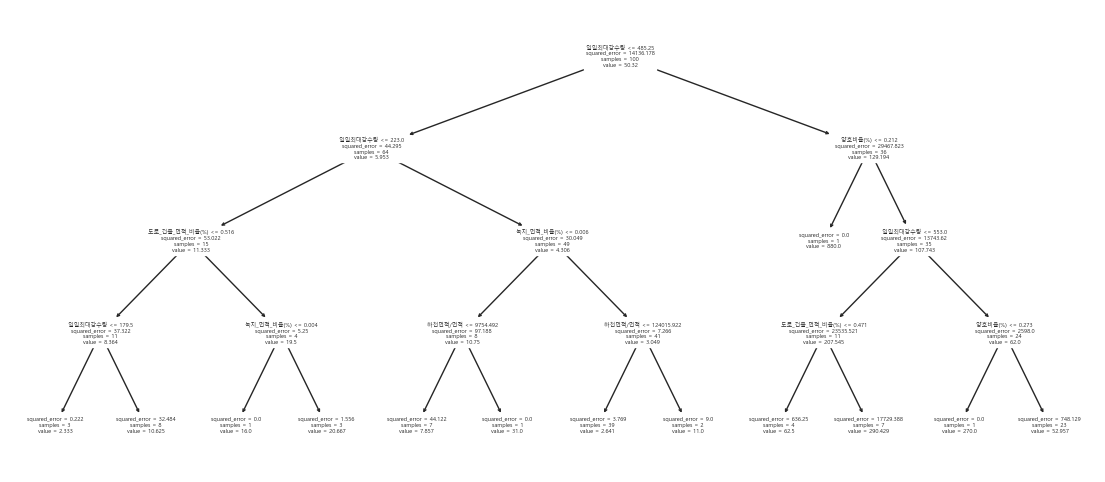

In [1420]:
plt.figure(figsize=(14, 6))
box_col = tree_models[0].feature_names_in_
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
sktree.plot_tree(tree_models[0], feature_names=rename_col2)
plt.savefig("tree[0].png", dpi=1000, bbox_inches="tight")

plt.show()
plt.close()

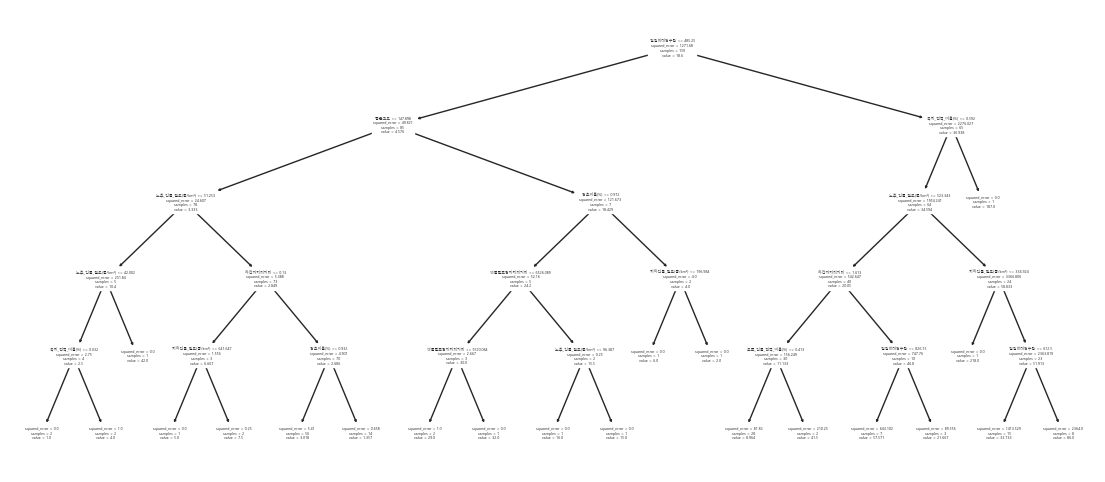

In [1421]:
plt.figure(figsize=(14, 6))
box_col = tree_models[1].feature_names_in_
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
sktree.plot_tree(tree_models[1], feature_names=rename_col2)
plt.savefig("./tree[1].png", dpi=1000, bbox_inches="tight")
plt.show()
plt.close()

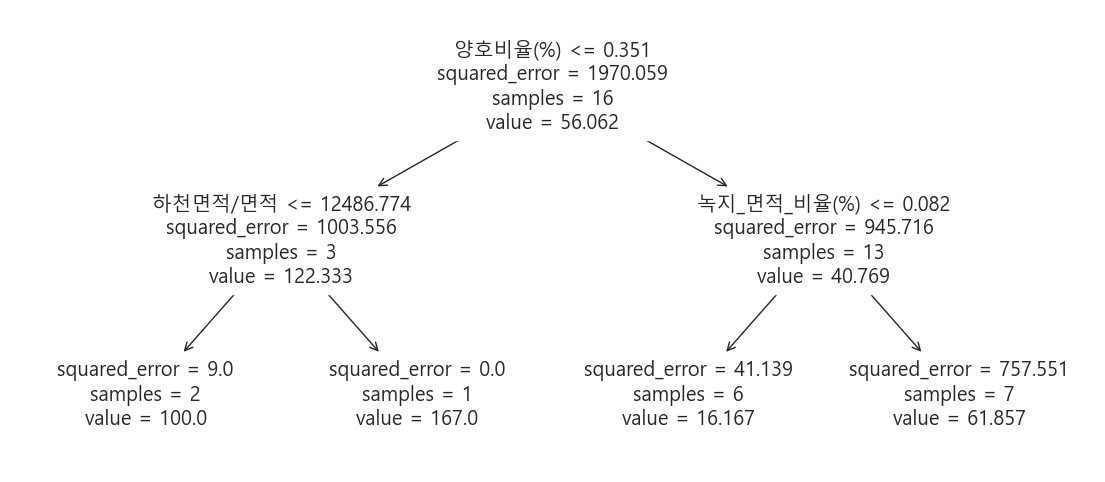

In [1422]:
plt.figure(figsize=(14, 6))
box_col = tree_models[2].feature_names_in_
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
sktree.plot_tree(tree_models[2], feature_names=rename_col2)
plt.savefig("tree[2].png", dpi=1000, bbox_inches="tight")

plt.show()
plt.close()

In [1423]:
def sub_backward_elimination(X, y, fixed):
    included = list(X.columns.difference(fixed))

    while True:
        model = sm.OLS(endog=y, exog=X[included + fixed]).fit()
        rsquard_adj = model.rsquared_adj
        worst_feature = None
        changed = False

        for feature in included:
            droped_feature = [x for x in included if x != feature]
            droped_model = sm.OLS(endog=y, exog=X[droped_feature + fixed]).fit()
            if droped_model.rsquared_adj > rsquard_adj:
                # print(droped_model.rsquared_adj,rsquard_adj)
                worst_feature = feature
                break
        # print(included)
        if worst_feature:
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    model = sm.OLS(y, X[included + fixed]).fit()
    return model  # , included, rsquard_adj

In [1429]:
feature_col

Index(['노후_건물_밀도(동/km²)', '녹지_면적_비율', '도로_건물_면적_비율', '면적당_소비액(백만원/km²)',
       '빗물펌프장까지의거리', '양호비율', '일일최대강수량', '지하건물_밀도(동/km²)', '집중호우_발생횟수', '평균고도',
       '하천까지의거리', '하천면적/면적'],
      dtype='object')

In [1430]:
out_Nomal_Regression_Result = {}
use_feature = {
    2: ["양호비율", "녹지_면적_비율", "하천면적/면적"],
    1: [
        "일일최대강수량",
        "양호비율",
        "노후_건물_밀도(동/km²)",
        "녹지_면적_비율",
        "빗물펌프장까지의거리",
        "평균고도",
        "지하건물_밀도(동/km²)",
        "하천까지의거리",
    ],
    0: ["일일최대강수량", "도로_건물_면적_비율", "하천면적/면적", "양호비율"],
}
for i in tree_cluster_df:
    X = tree_cluster_df[i][feature_col]
    X2 = sm.add_constant(tree_cluster_df[i][feature_col])
    # X=clustered_df[i][list(feature_col)+["const"]]
    y = tree_cluster_df[i][target_col]
    temp1 = sub_backward_elimination(X=X, y=y, fixed=use_feature[i])
    temp2 = sub_backward_elimination(X=X2, y=y, fixed=use_feature[i])
    if temp1.rsquared >= temp2.rsquared:
        out_Nomal_Regression_Result[i] = temp1
    else:
        out_Nomal_Regression_Result[i] = temp2

In [1431]:
out_Nomal_Regression_Result[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              7.718
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    2.36e-08
Time:                        02:45:11   Log-Likelihood:                         -599.60
No. Observations:                 100   AIC:                                      1217.
Df Residuals:                      91   BIC:                                      1241.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
면적당_소비액(백만원/km²)  3.724e+07   2.31e+07      1.611      0.111   -8.68e+06    8.32e+07
지하건물_밀도(동/km²)       0.0671      0.026      2.557      0.012       0.015       0.119
집중호우_발생횟수          -16.2541      4.475     -3.632      0.000     -25.143      -7.366
평균고도                -1.1193      0.688     -1.627      0.107      -2.486       0.247
하천까지의거리            -34.8680     16.627     -2.097      0.039     -67.896      -1.840
일일최대강수량              0.3053      0.071      4.296      0.000       0.164       0.447
도로_건물_면적_비율        -22.0810    146.206     -0.151      0.880    -312.500     268.338
하천면적/면적             -0.0002      0.000     -1.084      0.281      -0.001       0.000
양호비율               -39.1326     44.686     -0.876      0.383    -127.895      49.630
==============================================================================
Omnibus:                      104.483   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.069
Skew:                           3.423   Prob(JB):                         0.00
Kurtosis:                      20.436   Cond. No.                     1.35e+11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.94e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1432]:
out_Nomal_Regression_Result[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   침수횟수   R-squared (uncentered):                   0.421
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              10.17
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                    9.78e-13
Time:                        02:45:20   Log-Likelihood:                         -726.04
No. Observations:                 150   AIC:                                      1472.
Df Residuals:                     140   BIC:                                      1502.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
도로_건물_면적_비율        74.8520     35.382      2.116      0.036       4.900     144.804
집중호우_발생횟수          -4.4153      1.199     -3.681      0.000      -6.787      -2.044
일일최대강수량             0.0897      0.018      4.923      0.000       0.054       0.126
양호비율              -20.2161     13.997     -1.444      0.151     -47.890       7.458
노후_건물_밀도(동/km²)     0.0220      0.020      1.118      0.265      -0.017       0.061
녹지_면적_비율           19.9668     17.545      1.138      0.257     -14.721      54.654
빗물펌프장까지의거리         -0.0004      0.002     -0.166      0.868      -0.005       0.004
평균고도                0.1667      0.088      1.900      0.059      -0.007       0.340
지하건물_밀도(동/km²)     -0.0143      0.020     -0.715      0.476      -0.054       0.025
하천까지의거리             4.9867      4.740      1.052      0.295      -4.384      14.357
==============================================================================
Omnibus:                      118.407   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.598
Skew:                           2.917   Prob(JB):                    1.44e-217
Kurtosis:                      14.214   Cond. No.                     3.59e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1433]:
out_Nomal_Regression_Result[2].summary()


c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   침수횟수   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2.313
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.143
Time:                        02:45:29   Log-Likelihood:                -73.046
No. Observations:                  16   AIC:                             164.1
Df Residuals:                       7   BIC:                             171.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
노후_건물_밀도(동/km²)      0.2344      0.097      2.427      0.046       0.006       0.463
면적당_소비액(백만원/km²)  1.496e+08   7.78e+07      1.922      0.096   -3.44e+07    3.34e+08
일일최대강수량              0.3564      0.105      3.410      0.011       0.109       0.604
지하건물_밀도(동/km²)      -0.1631      0.058     -2.802      0.026      -0.301      -0.025
집중호우_발생횟수           -4.1802      2.194     -1.905      0.098      -9.368       1.008
평균고도                -0.8331      0.443     -1.879      0.102      -1.881       0.215
하천까지의거리            -42.7403     29.993     -1.425      0.197    -113.663      28.182
양호비율               -67.9697     50.321     -1.351      0.219    -186.959      51.019
녹지_면적_비율           110.2180    297.197      0.371      0.722    -592.541     812.977
하천면적/면적              0.0018      0.001      1.223      0.261      -0.002       0.005
==============================================================================
Omnibus:                        3.825   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                1.318
Skew:                          -0.152   Prob(JB):                        0.517
Kurtosis:                       1.627   Cond. No.                     1.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""